# Projekt <br><i>Burnout der Arbeiterschaft, <br>Vorhersage von Burnout bei Arbeitnehmern</i>

## Python

Neben den beiden Hauptwerkzeugen [MS Power BI](https://www.microsoft.com/de-de/power-platform/products/power-b)  und 
[Knime](https://www.knime.com/) wurde auch [Python](https://www.python.org/) herangezogen für:

- <i>»First Look«</i> auf die Daten
- Datenqualität beurteilen
- <acronym  title="Exploratory Data Analysis">EDA</acronym>
- Charts und Diagramme

### Bibliotheken einbinden und Trainingsdaten ansehen (<i>»First Look«</i>)

In [35]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import scipy.stats as st



df = pd.read_csv("dta/train.csv")

# Datensatz ansehen
x = 5
y = x
print(df.columns) # Spaltennamen

print(df.describe()) # Beschreibung

print(df.info()) # Info

print(df.head(x)) # Erste x Zeilen

print(df.tail(y)) # Erste y Zeilen


Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')
        Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns

## Datenqualität beurteilen

### Gibt es fehlende Werte (```NA```s)

In [36]:
mssng = df.isna().sum() # Listet die Summe der Spalten mit fehlenden Werten
print(mssng.sum())
print(mssng)
# x = 4622/22750 * 100
# print(f"{x}%")

4622
Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64


### Diskurs
Etwas über ```20%``` der Zeilen enthalten fehlende Werte - wie gehen wir damit um? 

1. wir droppen die Zeilen, oder
2. wir füllen die Werte (mit <var>median</var> o.ä.)

#### Entscheidung
Da auch in der abhängigen Variablen <var>Burn Rate</var> Werte fehlen, werden wir diese Werte zunächst droppen und weiter machen -  für die anderen Werte werden wir die <var> Pearson Korrelation</var> anwenden. 

Falls die Zeit dafür bleiben sollte, werden wir diverse Varianten gegeneinander hinsichtlich der Datenqualität bewerten.

In [37]:
df = df.dropna(subset=['Burn Rate'])
print(len(df)) #21626
21626 + 1124 # 22750 => ok!

21626


22750

### Unnötige Variablen

Folgende Variablen sind aus unser Sicht <ul>nicht relevant</ul> für die angestrebte Vorhersage:

- <var>Date of Joining</var> - es sind nur Einstellungen innerhalb des Kalenderjahres 2008 vorhanden
- <var>Employee ID</var> -Identifier aus einem "Fremdsystem"

In [38]:
df = df.drop("Date of Joining", axis=1)
print(df.head())

df = df.drop("Employee ID", axis=1)
print(df.head())

                Employee ID  Gender Company Type WFH Setup Available  \
0  fffe32003000360033003200  Female      Service                  No   
1      fffe3700360033003500    Male      Service                 Yes   
2  fffe31003300320037003900  Female      Product                 Yes   
3  fffe32003400380032003900    Male      Service                 Yes   
4  fffe31003900340031003600  Female      Service                  No   

   Designation  Resource Allocation  Mental Fatigue Score  Burn Rate  
0          2.0                  3.0                   3.8       0.16  
1          1.0                  2.0                   5.0       0.36  
2          2.0                  NaN                   5.8       0.49  
3          1.0                  1.0                   2.6       0.20  
4          3.0                  7.0                   6.9       0.52  
   Gender Company Type WFH Setup Available  Designation  Resource Allocation  \
0  Female      Service                  No          2.0      

## EDA

Wir werden uns zunächst 
- einen <i>Pairplot</i> erstellen 
- eine <i>Heatmap</i> erstellen

und danach die einzelnen Variablen ansehen.

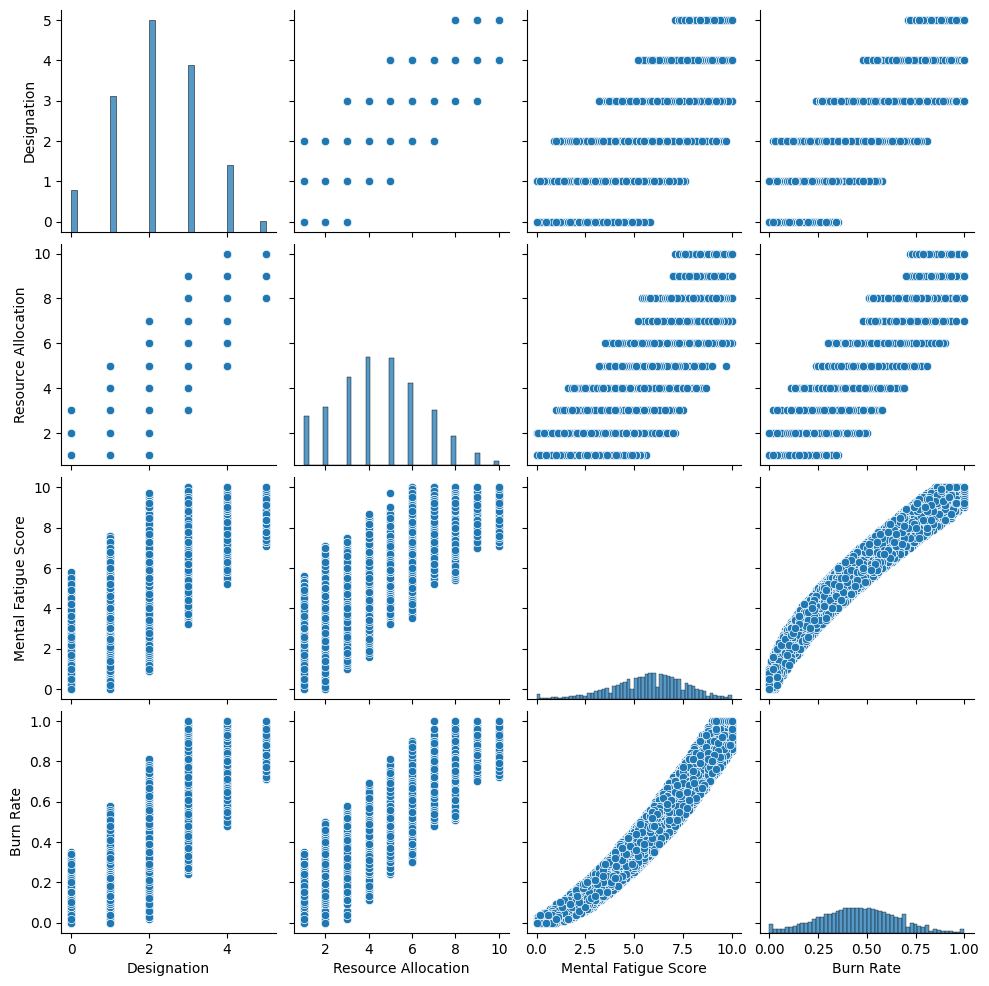

In [39]:
sns.pairplot(data=df)

### Designation vs. Resource Allocation

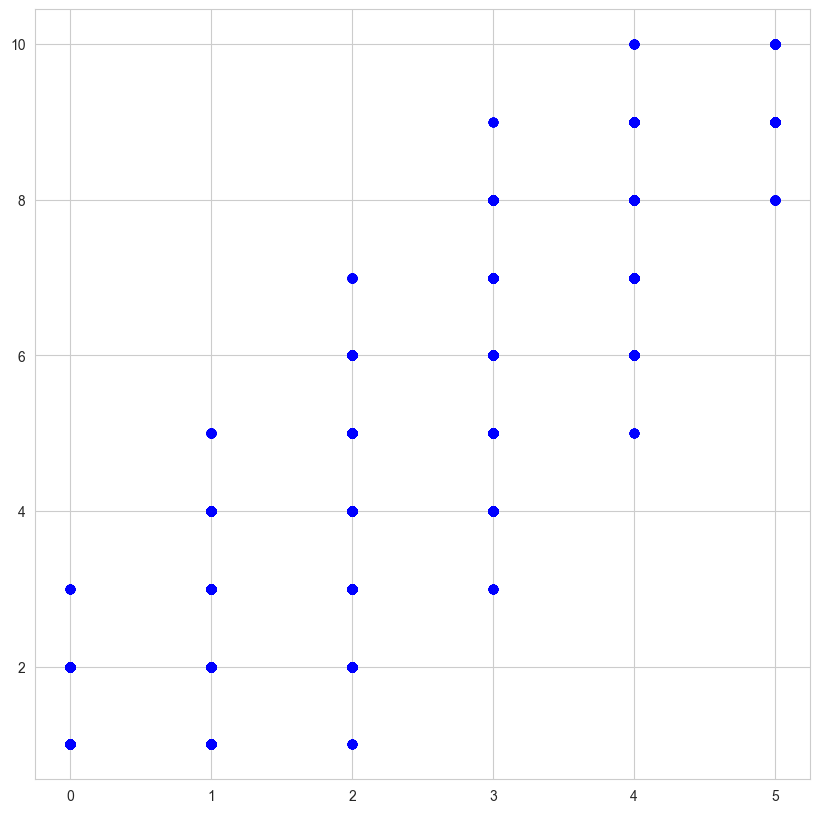

In [48]:
plt.figure(figsize=(10, 10))
plt.scatter("Designation", "Resource Allocation", data=df, c="blue")
plt.show()

### Variable <var>Gender</var>